<a href="https://colab.research.google.com/github/pttrilok/practical_deep_learning/blob/master/Lesson%209%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this module we are going to learn about

1. Basics of edge detections
2. Disucssion of face expression identification project
3. Canny edge detection algorithm
4. Intro to imgur(image hosting platform)
5. More on neural networks 

# ***Basics of edge detections***

In [2]:
!wget -O "input.jpg" "https://images.indianexpress.com/2017/04/anushka-shetty-1200.jpg"

--2020-08-20 12:03:39--  https://images.indianexpress.com/2017/04/anushka-shetty-1200.jpg
Resolving images.indianexpress.com (images.indianexpress.com)... 23.77.9.39
Connecting to images.indianexpress.com (images.indianexpress.com)|23.77.9.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90557 (88K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  88.43K  --.-KB/s    in 0.03s   

2020-08-20 12:03:39 (2.98 MB/s) - ‘input.jpg’ saved [90557/90557]



In [5]:
from PIL import Image, ImageDraw
from math import sqrt

# Load image:
input_image = Image.open("input.jpg")
input_pixels = input_image.load()

# Calculate pixel intensity as the average of red, green and blue colors.
intensity = [[sum(input_pixels[x, y]) / 3 for y in range(input_image.height)] for x in range(input_image.width)]

# Sobel kernels
kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                magx += intensity[xn][yn] * kernelx[a][b]
                magy += intensity[xn][yn] * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
output_image.save("output.png")


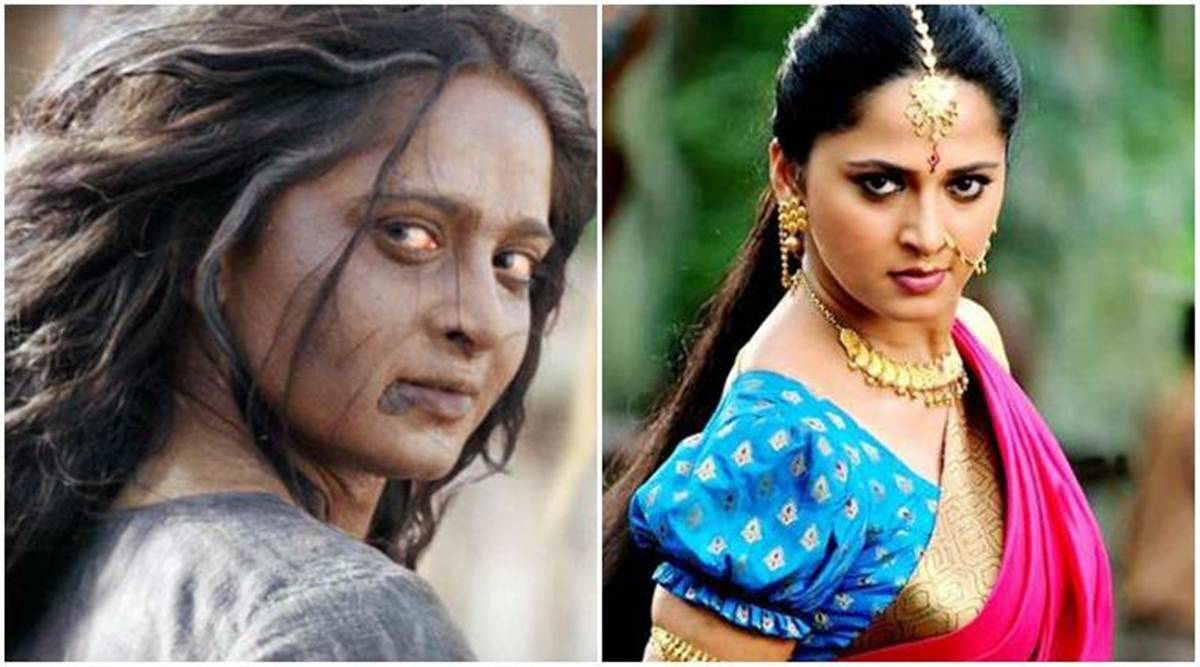

In [7]:
input_image= Image.open("input.jpg")
output_image =Image.open("output.png")
input_image

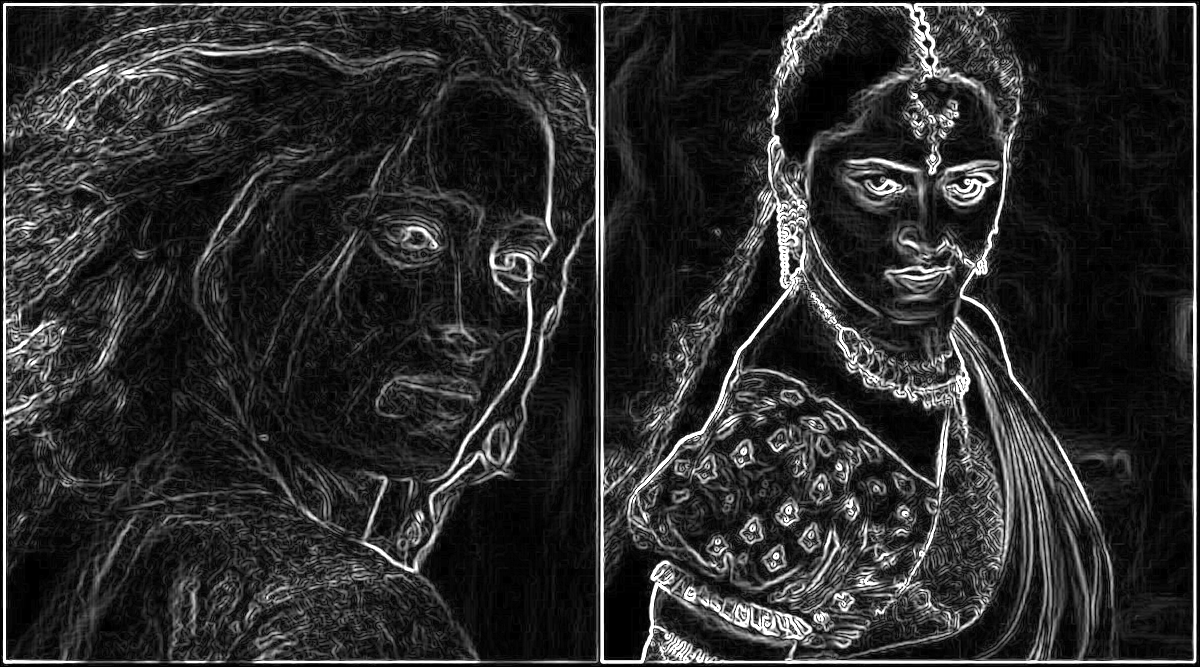

In [9]:
output_image

# ***Discussion of face expression identification project***

# ***Canny edge detection algorithm***

***Process of Canny edge detection algorithm***

The Process of Canny edge detection algorithm can be broken down to 5 different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise

2. Find the intensity gradients of the image

3. Apply non-maximum suppression to get rid of spurious response to edge detection

4. Apply double threshold to determine potential edges

5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

***Median Filtering***

Median filtering is a nonlinear method used to remove noise from
images.

It is widely used as it is very effective at removing noise while
preserving edges.

It is particularly effective at removing ‘salt and pepper’ type noise.

The median filter works by moving through the image pixel by pixel,
replacing each value with the median value of neighbouring pixels.

The pattern of neighbours is called the "window", which slides, pixel by
pixel over the entire image

The median is calculated by first sorting all the pixel values from the
window into numerical order, and then replacing the pixel being
considered with the middle (median) pixel value



Salt-and-pepper noise is a form of noise sometimes seen on images. It is also known as impulse noise. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.


Below is the example of salt and pepper noise

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Noise_salt_and_pepper.png/220px-Noise_salt_and_pepper.png)


In [ ]:
# import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
def auto_canny(image, sigma=0.33):
	v = np.median(image)
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	return edged

In [ ]:
def get_canny(test):
  image = cv2.imread(test)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  wide = cv2.Canny(blurred, 10, 200)
  tight = cv2.Canny(blurred, 225, 250)
  line_detect = cv2.Canny(gray,40,55,apertureSize = 3)
  auto = auto_canny(blurred)
  cv2_imshow(image)
  cv2_imshow(np.vstack([wide, tight, auto,line_detect]))

In [ ]:
!wget -O "test.jpg" "https://pbs.twimg.com/profile_images/1257511538430107648/J7fXSFpn_400x400.jpg"

--2020-08-20 06:27:07--  https://pbs.twimg.com/profile_images/1257511538430107648/J7fXSFpn_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.173.16, 2606:2800:220:13d:2176:94a:948:148e
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30253 (30K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  29.54K  --.-KB/s    in 0s      

2020-08-20 06:27:07 (281 MB/s) - ‘test.jpg’ saved [30253/30253]



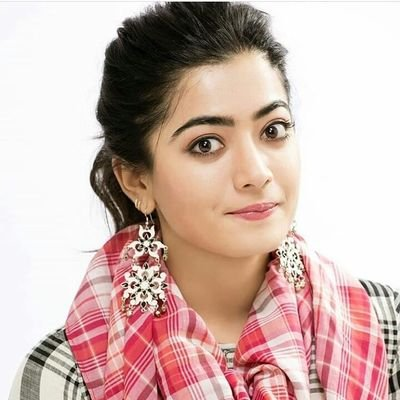

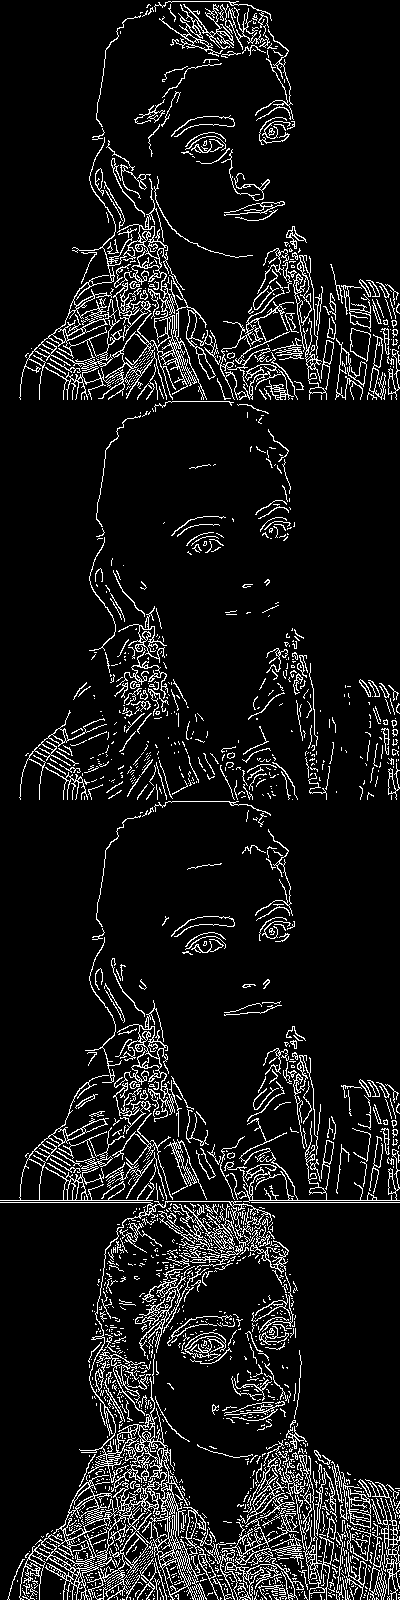

In [ ]:
get_canny("test.jpg")

In [ ]:
!wget -O "test2.jpg" "https://miro.medium.com/max/700/1*7adfBDWpNmpBAXLfOhXIag.jpeg"

--2020-08-20 07:25:25--  https://miro.medium.com/max/700/1*7adfBDWpNmpBAXLfOhXIag.jpeg
Resolving miro.medium.com (miro.medium.com)... 104.16.121.145, 104.16.117.145, 104.16.119.145, ...
Connecting to miro.medium.com (miro.medium.com)|104.16.121.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26327 (26K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]  25.71K  --.-KB/s    in 0s      

2020-08-20 07:25:25 (86.7 MB/s) - ‘test2.jpg’ saved [26327/26327]



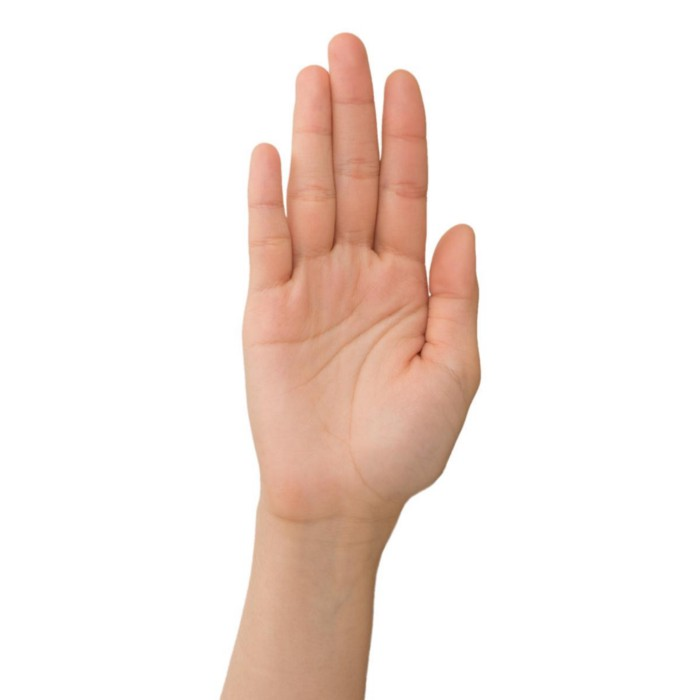

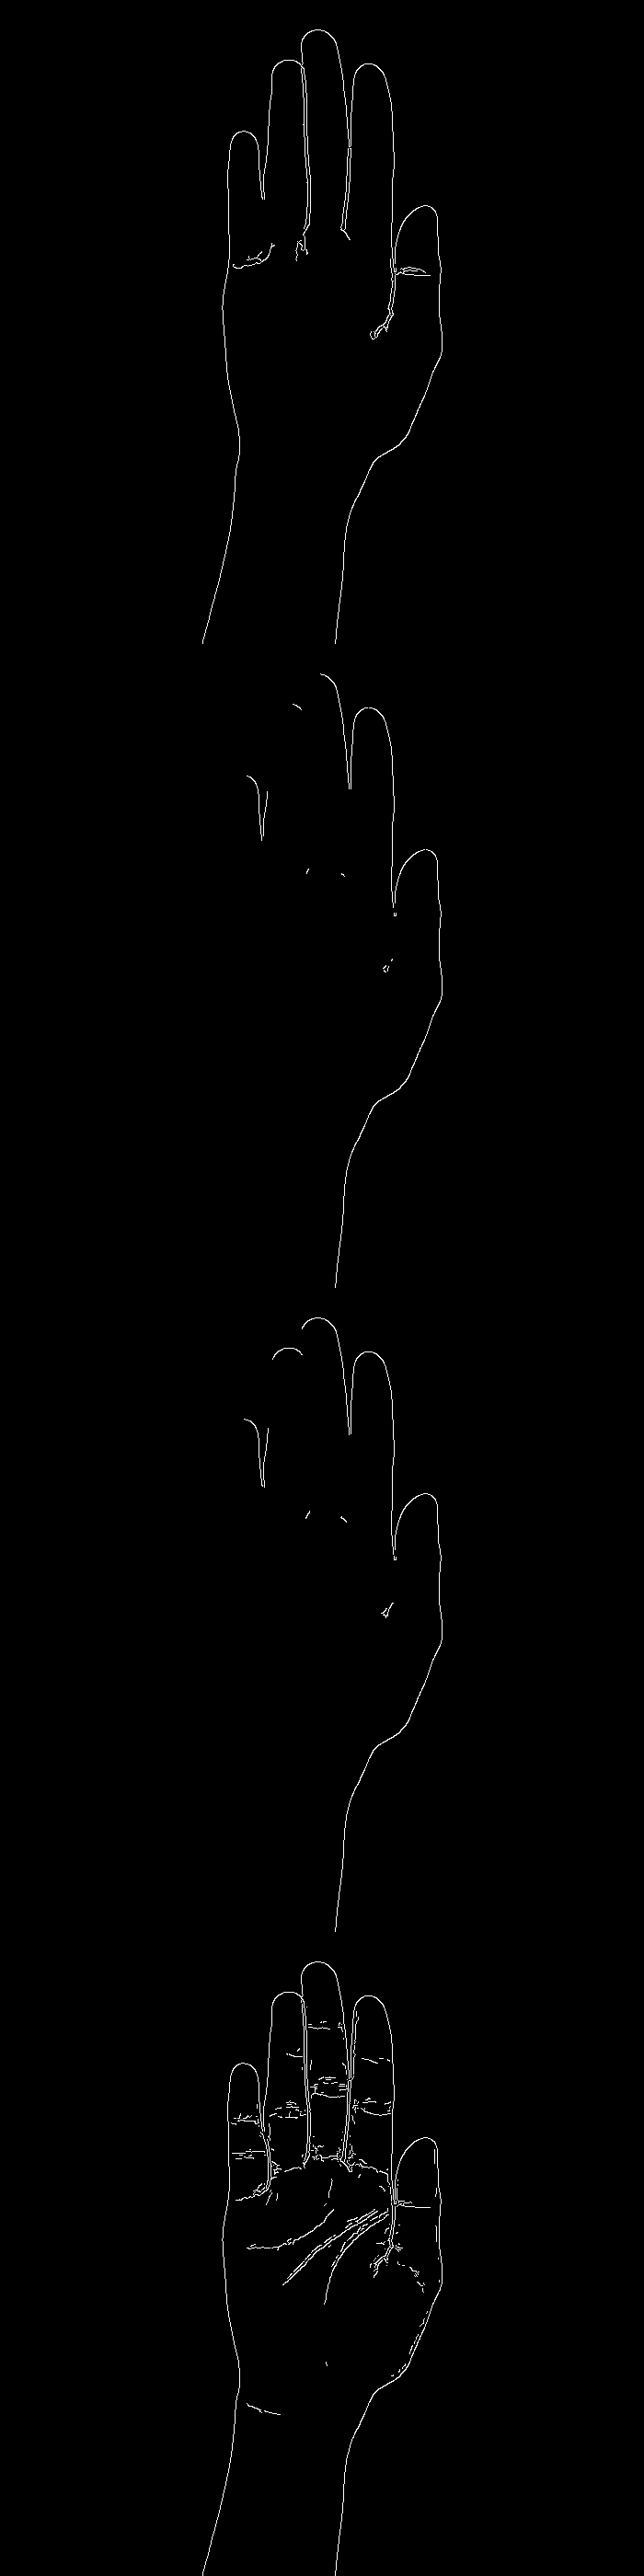

In [ ]:
get_canny("test2.jpg")

# ***Intro to imgur***

# ***More on neural network***